In [6]:
%matplotlib notebook
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.special import sph_harm
import scipy.special
from scipy.special import assoc_laguerre
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
from skimage import measure

In [7]:
def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    #Phi = numpy.arctan(Y/X)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    #s_harm=sph_harm(m, l, Theta, Phi)
    #l_poly = assoc_laguerre(rho, n-l-1, 2*l+1)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    #l_poly = scipy.special.genlaguerre(n+l,2*l+1)(rho)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    #prefactor=1
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
    

In [12]:
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z)
data = hydrogen_wf(4,2,0,X,Y,Z)
data = abs(data)**2
#data = data.real
print(sum(sum(sum(data)))*dz**3)
R = numpy.sqrt(X**2+Y**2+Z**2)
#print("Theta")
#print(numpy.arccos(Z/R))
#print("Phi")
#print(numpy.arctan2(Y,X))

0.151486700252


C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


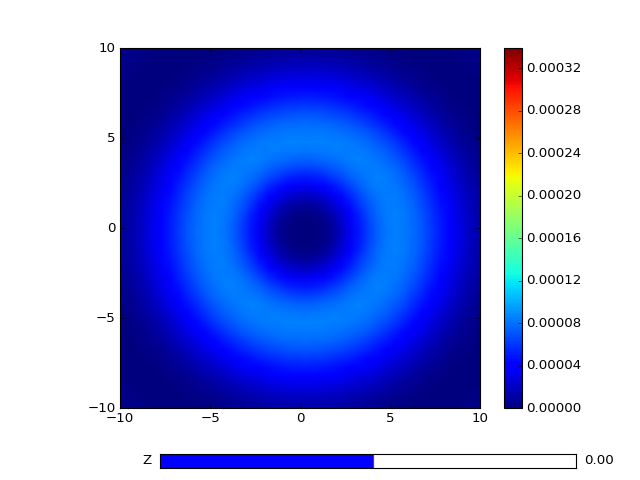

In [13]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
#im = plt.imshow(data[:,:,0], vmin=0, vmax=0.05,extent=[zmin,zmax,zmin,zmax])
im = plt.imshow(data[:,:,int((0-zmin)/dz)], vmin=0, vmax = numpy.max(data), extent=[zmin,zmax,zmin,zmax])
#im = plt.contour(data[:,:,0])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Z", z[0], z[len(z)-1], valinit=0)

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[:,:,index])
       
sli.on_changed(update)
plt.show()

<IPython.core.display.Javascript object>


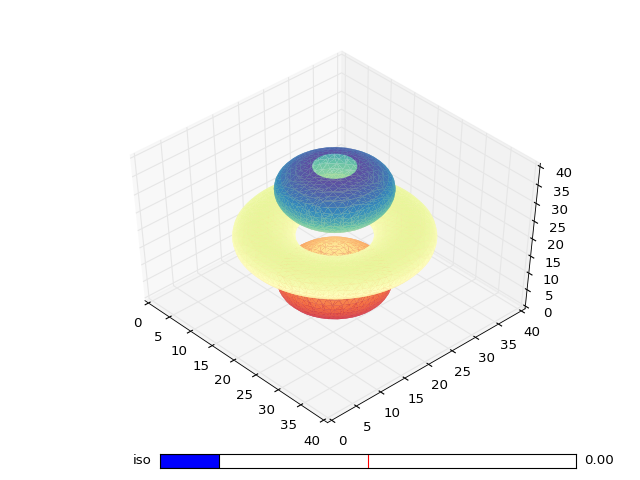

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])
max_val = numpy.max(data)
#ax.plot_surface(X,Y,zval+numpy.zeros_like(X), rstride=1, cstride=1, facecolors = my_cmap(colors))
verts, faces = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "iso", 0, max_val, valinit=max_val/2)

def update(val):
    ax.clear()
    verts, faces = measure.marching_cubes(data, sli.val, spacing = (1,1,1))
    result = ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
    ax.set_xlim([0,len(x)])
    ax.set_ylim([0,len(y)])
    ax.set_zlim([0,len(z)])
           
sli.on_changed(update)
plt.show()